In [1]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as plt3d
import random
from matplotlib import rc

ru = random.randint

In [7]:
from IPython.display import HTML

In [8]:
#Constant parameters
graphLimits = 1000
gravity = -1
count = 100
dt = 1
decayC = 1

#Collision Range
d = 5

In [11]:
#initialize particle positions
x = np.array([[ru(0,graphLimits)]])
y = np.array([[ru(0,graphLimits)]])
z = np.array([[ru(0,graphLimits)]])

vx = np.array([[ru(0,5)]], dtype = 'int')
vy = np.array([[ru(0,5)]], dtype = 'int')
vz = np.array([[ru(0,5)]], dtype = 'int')

ax = np.array([[0]], dtype = 'int')
ay = np.array([[0]], dtype = 'int')
az = np.array([[0]], dtype = 'int')

#Boundary Coniditon Check
vxnext = np.array([[0]], dtype = 'int')
vynext = np.array([[0]], dtype = 'int')
vznext = np.array([[0]], dtype = 'int')
xnext = np.array([[0]], dtype = 'int')
ynext = np.array([[0]], dtype = 'int')
znext = np.array([[0]], dtype = 'int')

In [13]:
#initialize Particles up to Particle Count
for i in range(0,count,1):
    x = np.append(x, [ru(0,graphLimits)])
    y = np.append(y, [ru(0,graphLimits)])
    z = np.append(z, [ru(0,graphLimits)])
    
    vx = np.append(vx, [ru(0,5)])
    vy = np.append(vy, [ru(0,5)])
    vz = np.append(vz, [ru(0,5)])
    
    ax = np.append(ax, [0])
    ay = np.append(ay, [0])
    az = np.append(az, [0])
    
    vxnext = np.append(vxnext, [0])
    vynext = np.append(vynext, [0])
    vznext = np.append(vznext, [0])
    xnext = np.append(xnext, [0])
    ynext = np.append(ynext, [0])
    znext = np.append(znext, [0])  

Text(0.5,0,'Z Label')

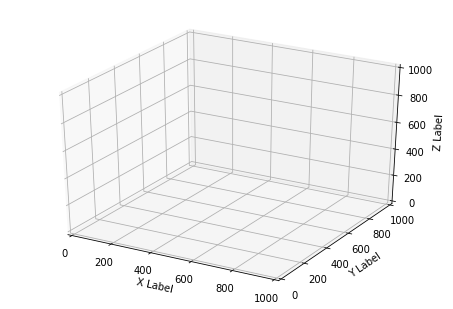

In [15]:
#set figure up
fig = plt.figure()
axe = plt3d.Axes3D(fig)
axe.set_xlim3d(0, graphLimits)
axe.set_ylim3d(0, graphLimits)
axe.set_zlim3d(0, graphLimits)
axe.set_xlabel('X Label')
axe.set_ylabel('Y Label')
axe.set_zlabel('Z Label')

In [16]:
#Animation Function
def update(dt):
    ax.fill(0)
    ay.fill(0)
    az.fill(0)
    
    az.fill(gravity)
    
    #Quantize small movements so that balls do not float outside of box
    for i in range(0,count+1,1):
        if vz[i] < 1 and z[i] < 1:
            az[i] = 0
        if vy[i] < 1 and y[i] < 1:
            ay[i] = 0.0
        if vx[i] < 1 and x[i] < 1:
            ax[i] = 0

    for i in range(0, count+1, 1):
        vx[i] += int((ax[i] * dt))
        vy[i] += int((ay[i] * dt))
        vz[i] += int((az[i] * dt))
    
    for i in range(0, count+1, 1):
        x[i] += int((vx[i] * dt))
        y[i] += int((vy[i] * dt))
        z[i] += int((vz[i] * dt))
        
        
    #Calculate Next position to predict if Boundary Collision Occurs
    for i in range (0, count+1, 1):
        xnext[i] = x[i]
        ynext[i] = y[i]
        znext[i] = z[i]
        
        xnext[i] += int(vx[i] * 1*dt)
        ynext[i] += int(vy[i] * 1*dt)
        znext[i] += int(vz[i] * 1*dt)
        
        
    #Check Boundary Collision Condition
    for i in range(0, count+1, 1):
        if xnext[i] < 0:
            vx[i] *= int(-1 * np.exp(-decayC))
        if xnext[i] > graphLimits:
            vx[i] *= int(-1 * np.exp(-decayC))
        
        if ynext[i] < 0:
            vy[i] *= int(-1 * np.exp(-decayC))
        if ynext[i] > graphLimits:
            vy[i] *= int(-1 * np.exp(-decayC))
        
        if znext[i] < 0:
            vz[i] *= int(-1 * np.exp(-decayC))
        if znext[i] > graphLimits:
            vz[i] *= int(-1 * np.exp(-decayC))
    
    #When are on floor X and Y movement should be dampened
    for i in range(0, count+1, 1):
        if z[i] < 0.2:
            vx[i] *= int(np.exp(-decayC/10))
            vy[i] *= int(np.exp(-decayC/10))
    
    #Collision with other particles
    for i in range(0, count+1, 1):
        for j in range (i+1, count+1, 1):
            if x[j] - d < x[i] < x[j] + d and y[j] - d < y[i] < y[j] + d and z[j] - d < z[i] < z[j] + d:
                ax[i] *= -1 
                ay[i] *= -1 
                az[i] *= -1 
                vx[i] *= -1 
                vy[i] *= -1 
                vz[i] *= -1 
                
                ax[j] *= -1 
                ay[j] *= -1 
                az[j] *= -1 
                vx[j] *= -1 
                vy[j] *= -1 
                vz[j] *= -1 


    axe.clear()  
    axe.scatter(x,y,z, s = d)
    axe.set_xlim3d(0, graphLimits)
    axe.set_ylim3d(0, graphLimits)
    axe.set_zlim3d(0, graphLimits)
    axe.set_xlabel('X Label')
    axe.set_ylabel('Y Label')
    axe.set_zlabel('Z Label')

In [17]:
#animate
anim = animation.FuncAnimation(fig, update, interval = dt*1000)

In [18]:
anim._repr_html_() is None

True

In [19]:
anim

In [20]:
rc('animation', html='jshtml')

In [21]:
anim